# Data and split

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data

data = load_data('Boston')

y = data['crim']
X = data.drop('crim', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

x_train

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
5,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
116,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,12.04,21.2
45,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,10.21,19.3
16,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,6.58,23.1
468,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,18.13,19.1
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,18.66,19.5
270,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,13.00,21.1
348,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,5.99,24.5
435,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,23.27,13.4


## Data visualisation (feature correlation)

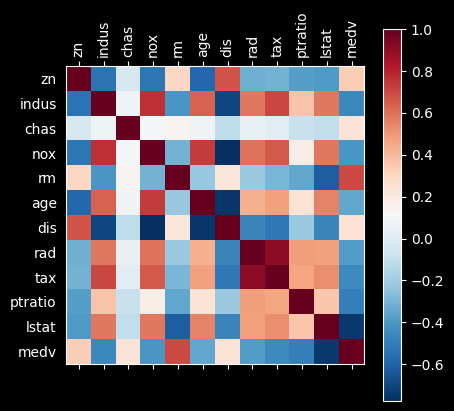

In [18]:
names = x_train.columns
df_features = pd.DataFrame(x_train, columns=names)

corr_mtx = df_features.corr(method='pearson')
plt.matshow(corr_mtx, cmap="RdBu_r")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.grid(False)
plt.show()

# Trees

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_features=6, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(max_features=6, random_state=42)

# Metric and plot func

In [26]:
from sklearn.metrics import mean_squared_error

# TODO: Function for plotting param vs error
def MSE_max_features(n_estimators:int, start:int=0, stop:int=5, plot_test:bool = False) -> None:
    global x_train, y_train, x_test, y_test

    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    train_loss = []
    val_loss = []
    for i in range(start, stop+1):
        model.set_params(max_features=i)
        model.fit(x_train, y_train)
        train_loss.append(mean_squared_error(y_train, model.predict(x_train)))
        val_loss.append(mean_squared_error(y_test, model.predict(x_test)))

    plt.plot(range(start, stop+1), train_loss, label="Training loss")
    if plot_test:
        plt.plot(range(start, stop+1), val_loss, label="Validation loss")

    plt.legend(loc='best')
    plt.xlabel("max_features")
    plt.ylabel("MSE")
    plt.show()

def MSE_n_estiator(max_features:int=5, start:int=100, stop:int=200, step:int=5, plot_test:bool = False) -> None:
    global x_train, y_train, x_test, y_test
    model = RandomForestRegressor(max_features=max_features, random_state=42)

    train_loss = []
    val_loss = []
    for i in range(start, stop+1, step):
        model.set_params(n_estimators=i)
        model.fit(x_train, y_train)
        train_loss.append(mean_squared_error(y_train, model.predict(x_train)))
        val_loss.append(mean_squared_error(y_test, model.predict(x_test)))

    plt.title(f'MSE for different n_estimators with {max_features=}')

    plt.plot(range(start, stop+1, step), train_loss, label="Training loss")
    if plot_test:
        plt.plot(range(start, stop+1, step), val_loss, label="Validation loss")

    plt.legend(loc='best')
    plt.xlabel('n_estimators')
    plt.ylabel('MSE')
    plt.show()




# Plotting

## Max Features

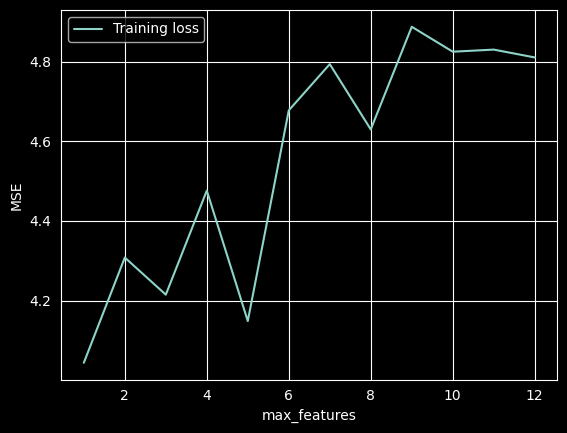

In [27]:
MSE_max_features(100,start=1, stop=12)

## estimators

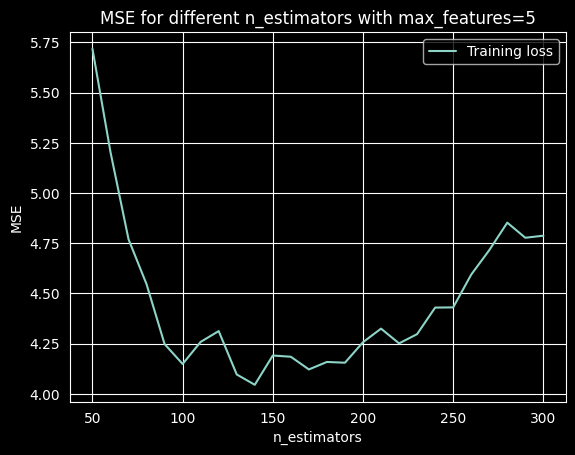

In [28]:
MSE_n_estiator(5, start=50, stop=300, step=10)

# Matrix

In [ ]:
import numpy as np


from sklearn.metrics import r2_score


def R2_estimatorsXfeatures_matrix(rows:int = 10,start:int = 100, test_data:bool = False) -> None:
    global x_train, y_train, x_test, y_test

    model = RandomForestRegressor(random_state=42)

    n_estimators = np.arange(start,start + 10*(rows+1), 10)
    max_features = np.arange(1, 12+1)

    mtx = np.zeros((len(n_estimators), len(max_features)))
    for idxI, i in enumerate(n_estimators):
        for idxJ, j in enumerate(max_features):
            model.set_params(n_estimators=i, max_features=j)
            model.fit(x_train, y_train)

            if test_data:
                mtx[idxI, idxJ] = r2_score(y_test, model.predict(x_test))
            else:
                mtx[idxI, idxJ] = r2_score(y_train, model.predict(x_train))

    plt.imshow(mtx, cmap="gray")
    plt.grid(False)
    plt.xticks(range(len(max_features)), max_features)
    plt.yticks(range(len(n_estimators)), n_estimators)
    plt.colorbar()
    plt.title("R2 for different combination of parameters")
    plt.xlabel("n_estimators")
    plt.ylabel("max_features")
    plt.show()




R2_estimatorsXfeatures_matrix(rows=12, start=10)